<a href="https://colab.research.google.com/github/OlhaZahrebelna/my_practis_on_github/blob/main/Zahrebelna_Olha_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [53]:
!pip install mysql-connector-python

In [54]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [55]:
con = mysql.connector.connect(user = 'user1', password = '7oygWy6P', host = '3.68.62.36', database = 'employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [56]:
cursor = con.cursor()

sql = 'SELECT max(hire_date), min(hire_date) FROM employees'
cursor.execute(sql)
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

In [57]:
cursor.close()

True

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [58]:
cursor = con.cursor()

sql = """
SELECT S1.emp_no, S1.salary, S1.from_date, S1.to_date
FROM salaries S1
JOIN (
  SELECT emp_no, MAX(to_date) AS max_to_date, MAX(from_date) AS max_from_date
  FROM salaries
  GROUP BY emp_no
) S2 ON S1.emp_no = S2.emp_no AND S1.from_date = S2.max_from_date AND S1.to_date = S2.max_to_date;
"""

cursor.execute(sql)


In [59]:
import pandas as pd

In [20]:
field_names = [i[0] for i in cursor.description]

In [60]:
res = pd.DataFrame(cursor.fetchall(), columns=field_names)

In [61]:
res.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [62]:
res.shape

(300024, 4)

In [63]:
res.columns

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [64]:
res.dtypes

,0
emp_no,int64
salary,int64
from_date,object
to_date,object


In [65]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300024 non-null  int64 
 1   salary     300024 non-null  int64 
 2   from_date  300024 non-null  object
 3   to_date    300024 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.2+ MB


In [66]:
res['to_date'].unique()

array([datetime.date(9999, 1, 1), datetime.date(2000, 7, 31),
       datetime.date(1996, 11, 9), ..., datetime.date(1986, 7, 18),
       datetime.date(1988, 5, 3), datetime.date(1987, 8, 25)],
      dtype=object)

In [67]:
count_9999 = (res['to_date'] == datetime.date(9999, 1, 1)).sum()
count_9999

240124

In [68]:
count_other = (res['to_date'] != datetime.date(9999, 1, 1)).sum()
count_other

59900

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [69]:
if count_9999 > 0:
    new_res = res[res['to_date'] == datetime.date(9999, 1, 1)]

In [70]:
new_res['to_date'].unique()

array([datetime.date(9999, 1, 1)], dtype=object)

In [71]:
from matplotlib import pyplot as plt

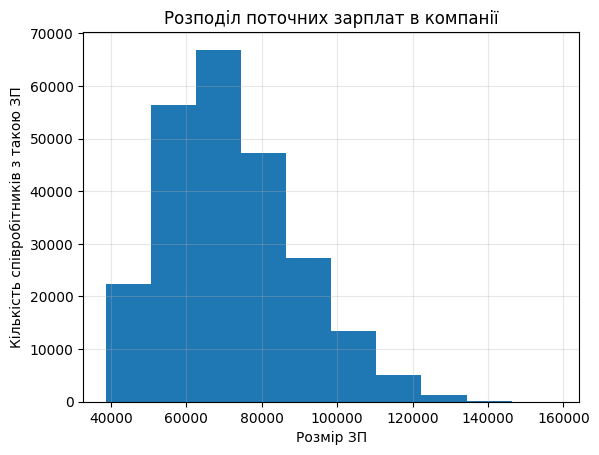

In [72]:
plt.hist(new_res['salary'])
plt.grid(axis='both', alpha=.3)
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП')
plt.title('Розподіл поточних зарплат в компанії');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [73]:
con.close()